In [220]:
import pandas as pd
import numpy as np

In [240]:
data = pd.read_csv('data.csv',index_col='Date')

In [241]:
data

,ticker,Name,Par,CoupRt,Freq,Maturity,YrsTMat,Close Price
Date,,,,,,,,
2018/1/31,G170009,17附息国债09,100,3.32,0,1,0.254795,100.00
2018/1/31,G170017,17附息国债17,100,3.33,0,1,0.504110,99.90
2018/1/31,G170024,17附息国债24,100,3.54,0,1,0.753425,100.00
2018/1/31,G170007,17附息国债07,100,3.13,1,5,4.197260,96.68
2018/1/31,G170014,17附息国债14,100,3.47,1,5,4.446575,97.95
...,...,...,...,...,...,...,...,...
2022/3/31,G170015,17附息国债15,100,4.05,2,30,25.315068,110.92
2022/3/31,G180017,18附息国债17,100,3.97,2,30,26.313541,109.01
2022/3/31,G190010,19附息国债10,100,3.86,2,30,27.309589,107.80


In [242]:
i = 1
((data.iloc[i,2])/data.iloc[i,7])**(1/data.iloc[i,6])-1

0.0019866573377025354

In [259]:
from scipy.optimize import root
def compute_rate(coup,t,price):
    if t >=1 :
        
        def func(x):
            return coup/(1+x)**(t-int(t)) * ((1-(1/(1+x)**int(t)))/(1-1/(1+x))) + (coup+100)/(1+x)**t - price
        sol = root(func, 0.0001)
    elif t < 1:
        def func(x):
            return (coup+100) / (1+x)**t - price
        sol = root(func,0.0001)
    return sol.x
def spot_rate(data):
    spot_lst = []
    for i in range(len(data)):
        
        if data.iloc[i,4] == 0 :
            spot_r = ((data.iloc[i,2])/data.iloc[i,7])**(1/data.iloc[i,6])-1
        elif data.iloc[i,4] == 1 :
            spot_r = compute_rate(data.iloc[i,3],data.iloc[i,6],data.iloc[i,7])[0]
        elif data.iloc[i,4] == 2 :
            spot_r = compute_rate(data.iloc[i,3]/2,data.iloc[i,6]*2,data.iloc[i,7])[0] *2
        
        spot_lst += [spot_r]
    data['spot_rate'] = spot_lst
    return data, spot_lst

In [260]:
df,spot_lst = spot_rate(data)

In [278]:
t = df[df.index=='2018/1/31']['YrsTMat']
y = df[df.index=='2018/1/31']['spot_rate']

In [279]:
t = t.tolist()
y = y.tolist()

In [280]:
y

[-0.006922751150812423,
 -0.0033289231759415783,
 -0.003731380541152407,
 -0.0026005024674797816,
 0.04076948600330515,
 0.022338369958340255,
 0.2658896634628665,
 0.028593447627006403,
 0.026169400674463432,
 0.029574714522610984,
 0.033858148421748835,
 0.03398121142110848,
 0.03462455039160985,
 0.03445562064949971,
 0.03437401112547125]

In [281]:
t

[0.230137,
 0.479452,
 0.747945,
 0.958904,
 0.539726,
 0.865753,
 0.10411,
 3.194521,
 3.605479,
 8.463014,
 25.484932,
 26.483404,
 26.732038,
 28.128767,
 47.40274]

In [282]:
df

,ticker,Name,Par,CoupRt,Freq,Maturity,YrsTMat,Close Price,spot_rate
Date,,,,,,,,,
2018/1/31,G170009,17附息国债09,100,3.32,0,1,0.254795,100.00,0.000000
2018/1/31,G170017,17附息国债17,100,3.33,0,1,0.504110,99.90,0.001987
2018/1/31,G170024,17附息国债24,100,3.54,0,1,0.753425,100.00,0.000000
2018/1/31,G170007,17附息国债07,100,3.13,1,5,4.197260,96.68,0.046901
2018/1/31,G170014,17附息国债14,100,3.47,1,5,4.446575,97.95,0.044696
...,...,...,...,...,...,...,...,...,...
2022/3/31,G170015,17附息国债15,100,4.05,2,30,25.315068,110.92,0.034444
2022/3/31,G180017,18附息国债17,100,3.97,2,30,26.313541,109.01,0.034870
2022/3/31,G190010,19附息国债10,100,3.86,2,30,27.309589,107.80,0.034579


In [288]:
y

array([-0.00692275, -0.00332892, -0.00373138, -0.0026005 ,  0.04076949,
        0.02233837,  0.26588966,  0.02859345,  0.0261694 ,  0.02957471,
        0.03385815,  0.03398121,  0.03462455,  0.03445562,  0.03437401])

In [283]:

((103.22/100)**(1/0.147945)-1)

0.23889240855234806

In [284]:
from nelson_siegel_svensson import NelsonSiegelSvenssonCurve
from nelson_siegel_svensson.calibrate import calibrate_nss_ols
import matplotlib.pyplot as plt
from nelson_siegel_svensson.calibrate import calibrate_ns_ols

NelsonSiegelCurve(beta0=0.03191146682473641, beta1=4.074472901204506, beta2=-4.3834113073889025, tau=0.041004318240657325)


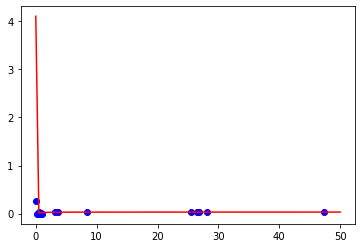

In [285]:
t = np.array(t)
y = np.array(y)

curve, status = calibrate_ns_ols(t, y, tau0=1.0)  # starting value of 1.0 for the optimization of tau
assert status.success
print(curve)
T =  np.linspace(0, 50, 100)
plt.plot(t, y, "bo")
plt.plot(T, curve(T), "r")
#Nelso-Siegel Model:

In [286]:
curve, status = calibrate_nss_ols(t, y) 
assert status.success
print(curve)
T =  np.linspace(0, 50, 100)
plt.plot(t, y, "bo")
plt.plot(T, curve(T), "r")

/Users/liuxuyang/opt/anaconda3/lib/python3.8/site-packages/nelson_siegel_svensson/nss.py:42: RuntimeWarning: overflow encountered in exp
  exp_tt1 = exp(-T/tau1)
/Users/liuxuyang/opt/anaconda3/lib/python3.8/site-packages/nelson_siegel_svensson/nss.py:45: RuntimeWarning: invalid value encountered in subtract
  factor2 = factor1 - exp_tt1


LinAlgError: SVD did not converge in Linear Least Squares

In [287]:
from scipy import interpolate
spl = interpolate.UnivariateSpline(t, y)
plt.plot(t, y, "bo")
plt.plot(t, spl(t), "r")

ValueError: x must be increasing if s > 0

In [258]:
df.index.value_counts()

2021/6/30     17
2020/9/29     16
2022/1/28     15
2021/12/31    15
2021/9/30     15
2021/8/31     15
2021/7/30     15
2021/5/31     14
2022/3/31     13
2022/2/28     12
2021/10/29    12
2020/3/23     12
2019/10/29    12
2020/7/24     11
2020/8/26     11
2021/4/30     11
2021/2/26     11
2021/3/31     11
2021/11/30    11
2020/10/29    10
2021/1/29     10
2019/12/31    10
2020/12/31     9
2020/11/30     9
2018/1/31      9
2019/11/21     9
2020/2/26      7
2019/3/29      7
2018/6/29      7
2020/6/30      7
2019/9/27      7
2018/11/27     6
2019/1/30      6
2020/1/23      6
2019/2/27      6
2019/6/28      6
2019/7/31      6
2019/8/29      6
2020/5/28      5
2018/10/31     5
2018/9/28      5
2018/7/26      5
2020/4/30      5
2018/5/30      5
2018/3/30      5
2018/2/28      5
2019/5/30      4
2019/4/29      4
2018/12/28     4
2018/8/27      4
2018/4/20      4
Name: Date, dtype: int64

In [ ]:
def func(x):
    return (coup+100) / (1+x)**t - price

sol = root(func,0.0001)